# Imports

In [59]:
import pandas as pd
import numpy as np
import pathlib
import calendar
import pickle
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load Data

In [2]:
filename = "df_128.pkl" # this is a cleaned DF with nulls
df_128 = pd.read_pickle(filename)

df_128.sort_values('OBSERVATION_TIME', inplace=True)

# drop unnecessary rows
df_128 = df_128.drop(['REF_TEMP', 'IN_PAVEMENT_TEMP', 'INTERNAL_TEMP', 'BATTERY_VOLTAGE'], axis=1)

In [30]:
data_test = df_128.copy()

In [20]:
data_test.OBSERVATION_TIME = data_test.OBSERVATION_TIME.to_string()

In [24]:
data_test.dropna(inplace=True)

In [25]:
data_test.isnull().sum().sum()

0

In [33]:
data_test = data_test.values

In [36]:
data_test[:1]

array([['128', Timestamp('2003-01-31 02:00:00+0000', tz='UTC'), 31.31,
        31.93, 31.85, 31.57, 31.07, 31.07, 31.0, 30.72, 30.86, 31.43,
        31.43, 31.92, 33.03, 33.73, 34.41, 34.88, 35.02]], dtype=object)

In [57]:
len(data_test)

110581

In [58]:
df_128.shape[0]

110581

In [38]:
import sys

In [40]:
sys.getsizeof(df_128)

23443196

In [41]:
sys.getsizeof(data_test)

112

In [ ]:
# np.save('df_128_array.np', data_test)
# df_128_array = np.load('df_128_array.np')

In [48]:
data_test_back = pd.DataFrame(data_test)

In [46]:
del data_test_back

In [49]:
data_test_back.dtypes

0                  object
1     datetime64[ns, UTC]
2                  object
3                  object
4                  object
5                  object
6                  object
7                  object
8                  object
9                  object
10                 object
11                 object
12                 object
13                 object
14                 object
15                 object
16                 object
17                 object
18                 object
dtype: object

In [51]:
data_test_back_dtypes = data_test_back.convert_dtypes()

In [53]:
data_test_back_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110581 entries, 0 to 110580
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   0       110581 non-null  string             
 1   1       110581 non-null  datetime64[ns, UTC]
 2   2       108054 non-null  Float64            
 3   3       106285 non-null  Float64            
 4   4       110523 non-null  Float64            
 5   5       110463 non-null  Float64            
 6   6       110416 non-null  Float64            
 7   7       110384 non-null  Float64            
 8   8       110419 non-null  Float64            
 9   9       110454 non-null  Float64            
 10  10      110450 non-null  Float64            
 11  11      110481 non-null  Float64            
 12  12      110470 non-null  Float64            
 13  13      110497 non-null  Float64            
 14  14      110553 non-null  Float64            
 15  15      110555 non-null  Float64  

In [54]:
data_test_back_dtypes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,128,2003-01-31 02:00:00+00:00,31.31,31.93,31.85,31.57,31.07,31.07,31.00,30.72,30.86,31.43,31.43,31.92,33.03,33.73,34.41,34.88,35.02
1,128,2003-01-31 03:00:00+00:00,34.11,31.37,32.07,32.14,31.51,30.94,31.23,30.80,30.80,31.09,31.51,32.07,32.42,33.60,34.08,34.76,35.10
2,128,2003-01-31 04:00:00+00:00,32.83,30.87,31.79,31.58,31.30,31.16,30.87,30.52,30.66,30.94,31.51,32.14,32.21,33.74,34.22,34.63,35.30
3,128,2003-01-31 05:00:00+00:00,32.47,31.37,32.15,31.79,31.51,31.37,31.02,30.80,30.80,31.02,31.23,31.73,32.50,33.54,34.29,34.83,35.30
4,128,2003-01-31 06:00:00+00:00,33.89,31.38,32.01,31.80,31.73,31.37,30.80,30.52,30.59,30.87,31.80,32.15,32.64,33.61,34.29,34.83,35.17


In [55]:
del data_test_back_dtypes

# Datetime

In [3]:
def datetime_parse(df):

    df['year'] = df.OBSERVATION_TIME.dt.year
    df['month'] = df.OBSERVATION_TIME.dt.month
    
    df['day'] = df.OBSERVATION_TIME.dt.day
    df['hour'] = df.OBSERVATION_TIME.dt.hour
    
    return df

In [4]:
df = datetime_parse(df_128)

In [ ]:
df.loc[(df.year==2004)
                    & (df.month==6)
                    & (df.day.between(24,29))]

https://stackoverflow.com/questions/50809594/remove-all-rows-in-pandas-dataframe-with-n-or-more-consecutive-nans

There's an issue between various influences of the state of a missed/flagged/null date, 
may need to employ this cell below to check for **ALL** missing dates 

https://stackoverflow.com/questions/52044348/check-for-any-missing-dates-in-the-index

https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe

In [ ]:
# TODO
# have to build a function to preprocess df_128_24_5 
# have to complete index date_range then reassemble the dataframe to include all dates including missing dates
# then have to change OBSERVATION_TIME to np.nan (NaT) whenever the flag columns have a value of 1
# then consecutive_3_days function needs to run for anything less than 73 of nan's in the OBSERVATION_TIME Column

# WHERE YOU LEFT OFF
# you are building the function with df_128_24_5 in mind, the cell 2 below (1 below df_128_24_5.head())
# this needs to be turned into a function which also converts the flags to np.nans

In [6]:
def index_entire_calendar(df):
    
    print(df.OBSERVATION_TIME.isnull().sum())
    
    idx = pd.date_range(df.OBSERVATION_TIME.min(), 
                  df.OBSERVATION_TIME.max(), freq="H", tz='UTC')
    
    df.index = pd.DatetimeIndex(df.OBSERVATION_TIME)
    
    df_reidx = df.reindex(idx, fill_value=np.nan)
    
    # df_reidx[['year','month','day','hour']] = df_reidx[['year','month','day','hour']].fillna(-1)
    
    """convert_dict = {'year': int, 
                'month': int,
                'day': int,
                'hour': int,
               } """
    
    df_reidx.year = df_reidx.year.astype('Int64')
    df_reidx.month = df_reidx.month.astype('Int64')
    df_reidx.day = df_reidx.day.astype('Int64')
    df_reidx.hour = df_reidx.hour.astype('Int64')
    
    df_reidx.loc[df_reidx.year==-1, ['year','month','day','hour']] = None
    
    print(df_reidx.OBSERVATION_TIME.isnull().sum())
    
    return df_reidx

In [7]:
df_reindex = index_entire_calendar(df)

0
20193


In [ ]:
df_reindex.loc[(df_reindex.index > '2004-06-24 17:00:00+00:00')& 
              (df_reindex.index < '2004-06-29 16:00:00+00:00' )]

In [9]:
df_reindex.loc[(df_reindex.index > '2004-06-25 17:00:00+00:00')& 
              (df_reindex.index < '2004-06-28 16:00:00+00:00' )].shape

(70, 23)

In [ ]:
df_reindex.loc[df_reindex.OBSERVATION_TIME.isna()].head()

In [ ]:
df_reindex.loc[(df_reindex.index > '2003-10-02 15:00:00+00:00')& 
              (df_reindex.index < '2003-10-02 20:00:00+00:00' )]

# Less Than 24 Hours

In [ ]:
datetime_less_list = df_reindex.groupby(df_reindex.OBSERVATION_TIME.dt.date)['OBSERVATION_TIME'].count()<24

datetime_less_list = datetime_less_list.loc[datetime_less_list==True]

# df_reindex.resample('D', on='OBSERVATION_TIME').count()

df_reindex.loc[df_reindex.OBSERVATION_TIME.dt.date.isin(datetime_less_list.index), 'hours_flag'] = 1

In [ ]:
df_reindex.head(30)

In [10]:
def less_than_24_hours(df):
    
    """
    this function determines if there is are less than 24 hours in a day of a month/year groupby object,
    then creates a hour_flag column and identifies it as flagged with a "1" value.
    
    This function involves groupby objects, masking, reindexing, and returns a new DataFrame.
    
    Argument:
    df: DataFrame with OBSERVATION_TIME, year, month, day columns
    
    Output:
    df_new: New DataFrame with similar design as original, but with addition of hours_flag column
    
    """
    print(df.OBSERVATION_TIME.isnull().sum())
    print(df.shape)
    
    datetime_less_list = df.groupby(df.OBSERVATION_TIME.dt.date)['OBSERVATION_TIME'].count()<24

    datetime_less_list = datetime_less_list.loc[datetime_less_list==True]
    
    df['hours_flag'] = 0
    
    df.loc[df.OBSERVATION_TIME.dt.date.isin(datetime_less_list.index), 'hours_flag'] = 1
    
    # df_index.loc[less_list,'OBSERVATION_TIME'] = np.nan # need to keep value until later
    
    print(df.OBSERVATION_TIME.isnull().sum())
    
    print(df.shape)
    
    return df

In [11]:
df_24 = less_than_24_hours(df_reindex)

20193
(130774, 23)
20193
(130774, 24)


In [ ]:
df_24.hours_flag.value_counts()

In [ ]:
df_24.isnull().sum()

In [ ]:
df_24.loc[(df_24.index > '2004-06-25 17:00:00+00:00')& 
              (df_24.index < '2004-06-29 00:00:00+00:00' )]

# 5 or more days total missing function

In [12]:
## Calendar Builder
## throws a warning about truth ambiguous for empty array. i believe it's for months that don't exist in the data.
## will need to develop logic for [arrray.size > 0] to avoid generating a future error. 

def more_than_5_total(df):
    
    days_month = df.groupby(['year','month'])['day'].nunique().reset_index()
   
    df['days_5_total_flag'] = 0
    # get the values used to created calendar
    days_arrays = days_month[['year', 'month']]
    
    # for loop to create calendar for use with calendar.monthlen
    for years in range(len(days_arrays.year.unique())):
        # print(days_arrays.loc[years, 'year'])
        yy = days_arrays.loc[days_arrays.year==days_arrays.year.unique()[years], 'year'].min()
        # print(yy)
        for months in range(len(days_arrays.month.unique())):
            # print(days_arrays.loc[months, 'month'])
            mm = days_arrays.loc[months, 'month'].max()
            # print(mm)
            # print(days_arrays.monthlen(yy,mm)-5)
            if (days_month.loc[(days_month['month']==mm) & (days_month['year']==yy)]['day'].values) > (calendar.monthlen(yy,mm)-5):
                # print("good")
                df.loc[(df.month==mm) & (df.year==yy), 'days_5_total_flag'] = 0
            else:
                df.loc[(df.month==mm) & (df.year==yy), 'days_5_total_flag'] = 1
                # df.loc[(df.month==mm) & (df.year==yy), 'OBSERVATION_TIME'] = np.nan
    
    return df

In [13]:
df_24_5 = more_than_5_total(df_24)

C:\Users\ejmason\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [14]:
df_24_5.days_5_total_flag.value_counts()

0    128974
1      1800
Name: days_5_total_flag, dtype: int64

## Observation Time Nulls

This next part is necessary for the consecutive 3 days function

In [15]:
df_24_5.OBSERVATION_TIME.isnull().sum()

20193

In [16]:
df_24_5.loc[(df_24_5.index > '2004-06-25 16:00:00+00:00')
            & (df_24_5.index < '2004-06-28 17:00:00+00:00')].shape

(72, 25)

In [17]:
df_24_5.loc[(df_24_5.index > '2004-06-25 16:00:00+00:00')
            & (df_24_5.index < '2004-06-28 17:00:00+00:00')]['OBSERVATION_TIME'].isna().sum()

72

In [18]:
df_24_5.loc[(df_24_5.hours_flag==1) | (df_24_5.days_5_total_flag==1), 'OBSERVATION_TIME'] = np.nan

In [19]:
df_24_5.OBSERVATION_TIME.isnull().sum()

23254

In [24]:
def consecutive_3_days(df, sort_by_time=False):
    """
    Function takes a dataframe and looks for consecutive flagged days by using a mask, ne(), shift(), and cumsum()
    the mask is made from non-flagged values ("O") in the "days_5_total_flag" column.
    Then used the ne() function to generate boolean values based on inequality between the following row (with shift()).
    It keeps a running count using cumsum().
    This sum of changes in the Boolean values is then grouped and filtered with transform for anything less than 3
    OR in the mask of non-flagged values.
    Records that groups of more than 3 and not in the mask are filtered out and not in the new Dataframe
    this function is preceded by the "more_than_5_total" function as it requires "days_5_total_flag" column.
    
    Arguments:
    df: DataFrame with a days_5_total_flag column
    
    Output:
    df: New DataFrame without the filtered values 
    """
    
    # pass argument to sort or pass through
    if sort_by_time is True:
        
        df = df.sort_values('OBSERVATION_TIME').copy() # dataframe must be sorted to perform
        
    print(df.shape)
    # creates a mask of non-flagged values (any row that doesn't have a 1 in the days_5_total_flag column)
    mask_zero = df.OBSERVATION_TIME.notna()
    
    # this uses the mask, and searches for a "NOT EQUAL" (ne) value below it using shift() which produces a boolean
    shift_sum = mask_zero.ne(mask_zero.shift()).cumsum() # everytime there is a difference in boolean value, it increments the count.
    
    # Filters the dataframe but grouping the cumulitve sum in "a" and getting the size.
    # if the size of a "False" group is less than 3 OR listed in mask variable, it remains and is turned into new DF
    df_exclude = df[(shift_sum.groupby(shift_sum.values).transform('size') >= 72) & ~mask_zero]
    
    df_exclude['dt_index'] = pd.DatetimeIndex(df_exclude.index)
    
    df['dt_index'] = pd.DatetimeIndex(df.index)
    
    df_drop = df.loc[~df.dt_index.dt.strftime('%Y-%m').isin(df_exclude.dt_index.dt.strftime('%Y-%m').values)]
    
    df_drop = df_drop.dropna(subset=['OBSERVATION_TIME'], axis=0)
    
    print(df_drop.shape)
    
    return df_drop

In [25]:
df_all_rules = consecutive_3_days(df_24_5)

(130774, 26)


C:\Users\ejmason\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(99768, 26)


In [32]:
df_all_rules.isnull().sum()

SITE_NUMBER             0
OBSERVATION_TIME        0
AMBIENT_AIR_TEMP     1952
TMR_PAV              3448
TMR_SUB_0              36
TMR_SUB_3              94
TMR_SUB_6             132
TMR_SUB_9             164
TMR_SUB_12            124
TMR_SUB_18            112
TMR_SUB_24            120
TMR_SUB_30             96
TMR_SUB_36            108
TMR_SUB_42             83
TMR_SUB_48             26
TMR_SUB_54             23
TMR_SUB_60             91
TMR_SUB_66            136
TMR_SUB_72              1
year                    0
month                   0
day                     0
hour                    0
hours_flag              0
days_5_total_flag       0
dt_index                0
dtype: int64

In [ ]:
df.dropna(subset=['TMR_SUB_0', 'TMR_SUB_3', 'TMR_SUB_6', 'TMR_SUB_9', 'TMR_SUB_12',
       'TMR_SUB_18', 'TMR_SUB_24', 'TMR_SUB_30', 'TMR_SUB_36', 'TMR_SUB_42',
       'TMR_SUB_48', 'TMR_SUB_54', 'TMR_SUB_60', 'TMR_SUB_66', 'TMR_SUB_72'], inplace=True, axis=0)

In [ ]:
df_all_rules.groupby(['year','month'])['day'].unique()

In [31]:
df_all_rules.groupby(['year','month'])['day'].nunique()

year  month
2003  2        28
      3        31
      4        30
      5        31
      6        29
      7        31
      8        31
      9        30
      10       28
      11       30
      12       31
2004  1        31
      3        31
      4        29
      5        31
      7        31
      8        31
      9        29
      10       31
      11       28
      12       31
2005  1        31
      2        28
      3        31
      6        28
      7        31
      8        31
      9        30
      10       31
      11       29
2006  2        28
      3        30
      4        29
      5        30
      6        29
      7        31
      8        31
      9        30
      10       28
      11       30
      12       28
2007  1        31
      2        28
      3        31
      4        30
      5        31
      6        30
      7        31
      8        31
      9        29
      10       30
      11       29
      12       29
2009  1        29
      2        2

In [33]:
df_all_rules_group = df_all_rules.groupby(['SITE_NUMBER','year','month']).mean().reset_index()

In [ ]:
df_all_rules_group

In [37]:
df_all_rules_group.pivot(index='year', columns=['month'], values='TMR_SUB_18').style.highlight_max(axis=0, color='red').highlight_min(axis=0, color='cyan')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2003,nan,31.466444,28.136649,37.174778,54.594704,60.529152,69.485067,64.191855,54.703769,43.318021,32.500764,24.645418
2004,15.229360,nan,29.655115,36.533309,56.247890,nan,70.955404,70.345054,55.596178,42.099288,32.969673,30.118185
2005,21.647989,21.246422,30.543342,nan,nan,64.029673,67.714522,65.489556,55.125083,41.756720,27.208317,nan
2006,nan,21.624524,23.782326,37.452299,51.718417,62.103175,65.819234,59.184194,52.729819,41.325432,17.649049,23.721177
2007,18.269880,23.941176,14.116433,35.660793,50.166653,60.294597,65.158065,62.124718,54.728420,39.344542,34.120905,27.817974
2009,13.859940,19.067854,24.560513,35.863306,53.829931,61.451833,68.187446,61.557473,53.797681,43.053361,nan,nan
2010,13.675349,28.235976,29.298078,36.568691,54.183122,61.318903,60.554960,nan,nan,39.646788,32.891097,nan
2012,nan,nan,23.619495,39.284923,49.555349,60.311488,60.604368,60.590901,50.802471,37.558412,22.451903,10.810748
2013,10.943773,25.141699,27.247243,33.737319,49.561062,67.259458,67.754069,63.757124,52.934472,42.509731,32.915201,19.531868


In [39]:
# filename = "df_128_all_18.pkl"
filename = "df_all_rules.pkl"
df_all_rules.to_pickle(filename)

In [60]:
data_test = pd.read_pickle("df_all_rules.pkl")

In [64]:
data_test_group = data_test.groupby(['SITE_NUMBER','year','month']).mean().reset_index()

In [81]:
data_test_group_pivot = data_test_group.pivot(index='year', 
                                              columns='month', 
                                              values='TMR_SUB_18')

In [106]:
data_test_group_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 2003 to 2017
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       9 non-null      float64
 1   2       11 non-null     float64
 2   3       13 non-null     float64
 3   4       12 non-null     float64
 4   5       12 non-null     float64
 5   6       12 non-null     float64
 6   7       12 non-null     float64
 7   8       12 non-null     float64
 8   9       12 non-null     float64
 9   10      13 non-null     float64
 10  11      11 non-null     float64
 11  12      9 non-null      float64
dtypes: float64(12)
memory usage: 1.3 KB


In [91]:
data_test_group_melt = data_test_group.melt(id_vars=['year','month'], value_vars=['TMR_SUB_18'])

In [92]:
data_test_group_melt.columns

Index(['year', 'month', 'variable', 'value'], dtype='object')

In [115]:
data_test_group_pivot.iloc[:, :1].values

array([[        nan],
       [15.22936022],
       [21.6479892 ],
       [        nan],
       [18.26988005],
       [13.85993966],
       [13.67534946],
       [        nan],
       [10.94377322],
       [29.12796496],
       [28.94465587],
       [        nan],
       [17.04522849]])

In [124]:
list(['year']) + list(data_test_group_pivot.columns)

['year', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [126]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=list(['year']) + list(data_test_group_pivot.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[data_test_group_pivot.index, 
                       data_test_group_pivot.iloc[:, :1].values,
                       data_test_group_pivot.iloc[:, 1:2].values,
                       data_test_group_pivot.iloc[:, 2:3].values,
                       data_test_group_pivot.iloc[:, 3:4].values,
                       data_test_group_pivot.iloc[:, 4:5].values,
                       data_test_group_pivot.iloc[:, 5:6].values,
                       data_test_group_pivot.iloc[:, 6:7].values,
                       data_test_group_pivot.iloc[:, 7:8].values,
                       data_test_group_pivot.iloc[:, 8:9].values,
                       data_test_group_pivot.iloc[:, 9:10].values,
                       data_test_group_pivot.iloc[:, 10:11].values,
                       data_test_group_pivot.iloc[:, 11:12].values,],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [86]:
data = df_all_rules.loc[(df_all_rules.index >= '2017-01-01 00:00:00+00:00')
            & (df_all_rules.index < '2018-01-01 00:00:00+00:00')]

In [87]:
data.head()

,SITE_NUMBER,OBSERVATION_TIME,AMBIENT_AIR_TEMP,TMR_PAV,TMR_SUB_0,TMR_SUB_3,TMR_SUB_6,TMR_SUB_9,TMR_SUB_12,TMR_SUB_18,TMR_SUB_24,TMR_SUB_30,TMR_SUB_36,TMR_SUB_42,TMR_SUB_48,TMR_SUB_54,TMR_SUB_60,TMR_SUB_66,TMR_SUB_72,year,month,day,hour,hours_flag,days_5_total_flag,dt_index
2017-01-01 00:00:00+00:00,128,2017-01-01 00:00:00+00:00,15.38,13.46,20.96,21.53,22.16,22.50,23.10,24.45,25.83,27.53,29.00,30.74,31.53,32.51,33.27,34.28,35.22,2017,1,1,0,0,0,2017-01-01 00:00:00+00:00
2017-01-01 01:00:00+00:00,128,2017-01-01 01:00:00+00:00,13.58,12.47,20.84,21.43,22.10,22.46,23.09,24.46,25.84,27.54,29.00,30.75,31.53,32.51,33.27,34.29,35.22,2017,1,1,1,0,0,2017-01-01 01:00:00+00:00
2017-01-01 02:00:00+00:00,128,2017-01-01 02:00:00+00:00,12.57,12.48,20.74,21.34,22.03,22.41,23.07,24.48,25.85,27.55,29.01,30.75,31.55,32.52,33.28,34.30,35.23,2017,1,1,2,0,0,2017-01-01 02:00:00+00:00
2017-01-01 03:00:00+00:00,128,2017-01-01 03:00:00+00:00,12.91,12.97,20.66,21.26,21.97,22.37,23.05,24.48,25.87,27.56,29.02,30.77,31.55,32.53,33.28,34.30,35.22,2017,1,1,3,0,0,2017-01-01 03:00:00+00:00
2017-01-01 04:00:00+00:00,128,2017-01-01 04:00:00+00:00,13.28,13.78,20.57,21.18,21.90,22.32,23.02,24.47,25.87,27.57,29.02,30.77,31.56,32.53,33.29,34.30,35.22,2017,1,1,4,0,0,2017-01-01 04:00:00+00:00


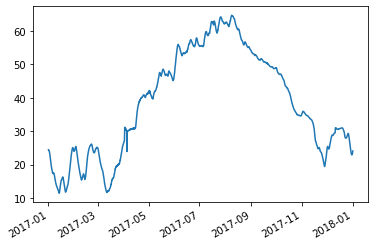

In [69]:
fig = data.plot()

In [60]:
all_years_plot = px.line(df_all_rules, x='OBSERVATION_TIME', y='TMR_SUB_18', color='year')

In [59]:
import datapane as dp

In [70]:
dp.Report(dp.Plot(fig), 
          dp.Table(data)).publish(name='TDP 128 Report', open=True)

ValueError: not enough values to unpack (expected 2, got 1)

In [72]:
!pip install -U --trusted-host pypi.org --trusted-host files.pythonhosted.org datapane

ERROR: Cannot uninstall 'ruamel-yaml'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached ruamel.yaml-0.16.12-py2.py3-none-any.whl (111 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached jupyterlab_pygments-0.1.2-py2.py3-none-any.whl (4.6 kB)
  Created wheel for bokeh: filename=bokeh-2.0.0-py3-none-any.whl size=8982372 sha256=e230873fef354df5316747338a69179a2b09c8e72a6d9fd94cb054fae429b639
  Stored in directory: c:\users\ejmason\appdata\local\pip\cache\wheels\91\fc\b0\ef9a9e80e667e3f3054f4612a6d203295046ce9c35ca426f43
  Created wheel for face: filename=face-20.1.1-py3-none-any.whl size=51078 sha256=1c049d977a9e4a6850d82a84456ce692857d8e5c6df233667bc3929a153c4c94
  Stored in directory: c:\users\ejmason\appdata\local\pip\cache\wheels\67\03\c2\76d2e1e694852ce409ac2938b9f461bc0fdf3789901e7bb1f0
  Created wheel for micawber: filename=micawber-0.5.2-py3-none-any.whl size=22137 sha256=d7455818444ca4878961ef811fc685c2a6f9ff6011df7922f588e3c2b987b009
  Stored in directory: c:\users\

In [78]:
dp.Table.__dict__

mappingproxy({'__module__': 'datapane.client.api.report',
              '__doc__': '\n    Table blocks store a dataframe that can be viewed and filtered in your report, and exported to CSV or Excel.\n    Provides pivot-table functionality by default.\n    ',
              'tag': 'Table',
              '__init__': <function datapane.client.api.report.Table.__init__(self, df: pandas.core.frame.DataFrame, caption: Union[str, NoneType] = None, can_pivot: bool = True, id: str = None)>,
              '__abstractmethods__': frozenset(),
              '_abc_impl': <_abc_data at 0x23104c454e0>})

In [96]:
data = data.drop(columns=['AMBIENT_AIR_TEMP','TMR_PAV','dt_index'], axis=1)

KeyError: "['AMBIENT_AIR_TEMP' 'TMR_PAV'] not found in axis"

In [97]:
data = data.drop(columns=['dt_index'], axis=1)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8681 entries, 2017-01-01 00:00:00+00:00 to 2017-12-31 23:00:00+00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   SITE_NUMBER        8681 non-null   object             
 1   OBSERVATION_TIME   8681 non-null   datetime64[ns, UTC]
 2   TMR_SUB_0          8681 non-null   float64            
 3   TMR_SUB_3          8681 non-null   float64            
 4   TMR_SUB_6          8681 non-null   float64            
 5   TMR_SUB_9          8681 non-null   float64            
 6   TMR_SUB_12         8681 non-null   float64            
 7   TMR_SUB_18         8681 non-null   float64            
 8   TMR_SUB_24         8681 non-null   float64            
 9   TMR_SUB_30         8681 non-null   float64            
 10  TMR_SUB_36         8681 non-null   float64            
 11  TMR_SUB_42         8681 non-null   float64            
 12  

In [92]:
data.dropna(inplace=True)

In [98]:
r = dp.Report(dp.Table(df_all_rules_group))
r.publish(name='TDP 128', open=True)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Additional Testing

In [ ]:
checker_df = df_all_rules_drop.loc[(df_all_rules_drop.index >= '2015-08-01 00:00:00+00:00')
            & (df_all_rules_drop.index < '2015-11-01 00:00:00+00:00')]

In [ ]:
checker_df2 = df_all_rules_drop.loc[(df_all_rules_drop.index >= '2014-08-01 00:00:00+00:00')
            & (df_all_rules_drop.index < '2014-11-01 00:00:00+00:00')]

In [ ]:
checker_df.groupby(['year','month','day']).count()

In [ ]:
checker_df.tail()

In [ ]:
checker_df2.tail()

In [ ]:
checker_df.TMR_SUB_18==checker_df2.TMR_SUB_18

In [ ]:
df_exclude.loc[(df_exclude.index > '2005-05-01 00:00:00+00:00')
            & (df_exclude.index < '2005-06-01 00:00:00+00:00')].head(100)

In [ ]:
df_24_5_copy = df_24_5.copy()

In [ ]:
df_24_5_copy['dt_month'] = pd.DatetimeIndex(df_24_5_copy.index).month

In [ ]:
df_24_5_copy['dt_year'] = pd.DatetimeIndex(df_24_5_copy.index).year

In [ ]:
df.groupby(df.OBSERVATION_TIME.dt.date).head()

In [ ]:
df_clear.shape

In [ ]:
df_24_5_copy.head()

In [ ]:
df_24_5.loc[df_24_5.index]

In [ ]:
df = consecutive_3_days(df_24_5)

In [ ]:
df.hours_flag.value_counts()

In [ ]:
df.loc[(df.index > '2004-06-24 17:00:00+00:00')
            & (df.index < '2004-06-29 16:00:00+00:00')]